In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np

import matplotlib.colors as mcolors
import dateutil
import datetime
import locale

In [2]:
locale.setlocale(locale.LC_ALL, 'es_CL.utf8')

'es_CL.utf8'

In [3]:
df = pd.read_csv("COVID19CL_R14_accumulated.csv", index_col=0, parse_dates=True)

df.iloc[-10:] #show last row,, in this case, the latest recorded data


Valdivia  Corral  Lanco  Los Lagos  Mafíl  Mariquina  Paillaco  \
FECHA                                                                        
2020-05-13       123       6      9          0      2         11         1   
2020-05-14       124       7      9          0      2         11         1   
2020-05-15       124      11      9          0      2         12         1   
2020-05-16       124      11      9          0      2         12         1   
2020-05-17       125      11      9          0      2         12         1   
2020-05-18       125      11      9          0      2         12         1   
2020-05-19       125      11      9          0      2         13         1   
2020-05-20       141      11      9          0      2         13         1   
2020-05-21       144      11      9          0      3         14         3   
2020-05-22       145      11      9          0      3         14         4   

            Panguipulli  La Unión  Río Bueno  Futrono  Lago Ranco  \
FECHA                                                               
2020-05-13            0        40         12        5           2   
2020-05-14            0        40         12        5           2   
2020-05-15            0        40         12        5           2   
2020-05-16            0        40         12        5           2   
2020-05-17            0        40         12        5           2   
2020-05-18            1        41         12        7           2   
2020-05-19            3        42         12        8           2   
2020-05-20            3        42         12       10           2   
2020-05-21            3        42         13       14           2   
2020-05-22            4        42         13       15           2   

            Total Acumulado  Total Recuperados  Total Mortalidad  \
FECHA                                                              
2020-05-13              211                172                 6   
2020-05-14              213                177                 6   
2020-05-15              218                185                 6   
2020-05-16              218                187                 6   
2020-05-17              219                187                 6   
2020-05-18              223                188                 6   
2020-05-19              228                189                 6   
2020-05-20              246                191                 6   
2020-05-21              258                192                 6   
2020-05-22              262                194                 6   

            Total Activos  En Cuarentena  Total Cuarentena  
FECHA                                                       
2020-05-13             33            123               156  
2020-05-14             30            132               162  
2020-05-15             27             99               126  
2020-05-16             25             85               110  
2020-05-17             26             79               105  
2020-05-18             29             56                85  
2020-05-19             33             76               109  
2020-05-20             49            116               165  
2020-05-21             60            138               198  
2020-05-22             62            210               272

In [4]:
date_begin = df.index.values.min()
date_end = df.index.values.max()
date_begin_obj = dateutil.parser.parse(np.datetime_as_string(date_begin))
date_end_obj = dateutil.parser.parse(np.datetime_as_string(date_end))
date_begin_int = int(date_begin_obj.strftime('%Y%m%d'))
date_end_int = int(date_end_obj.strftime('%Y%m%d'))
date_prev_obj = date_end_obj - datetime.timedelta(days=1)

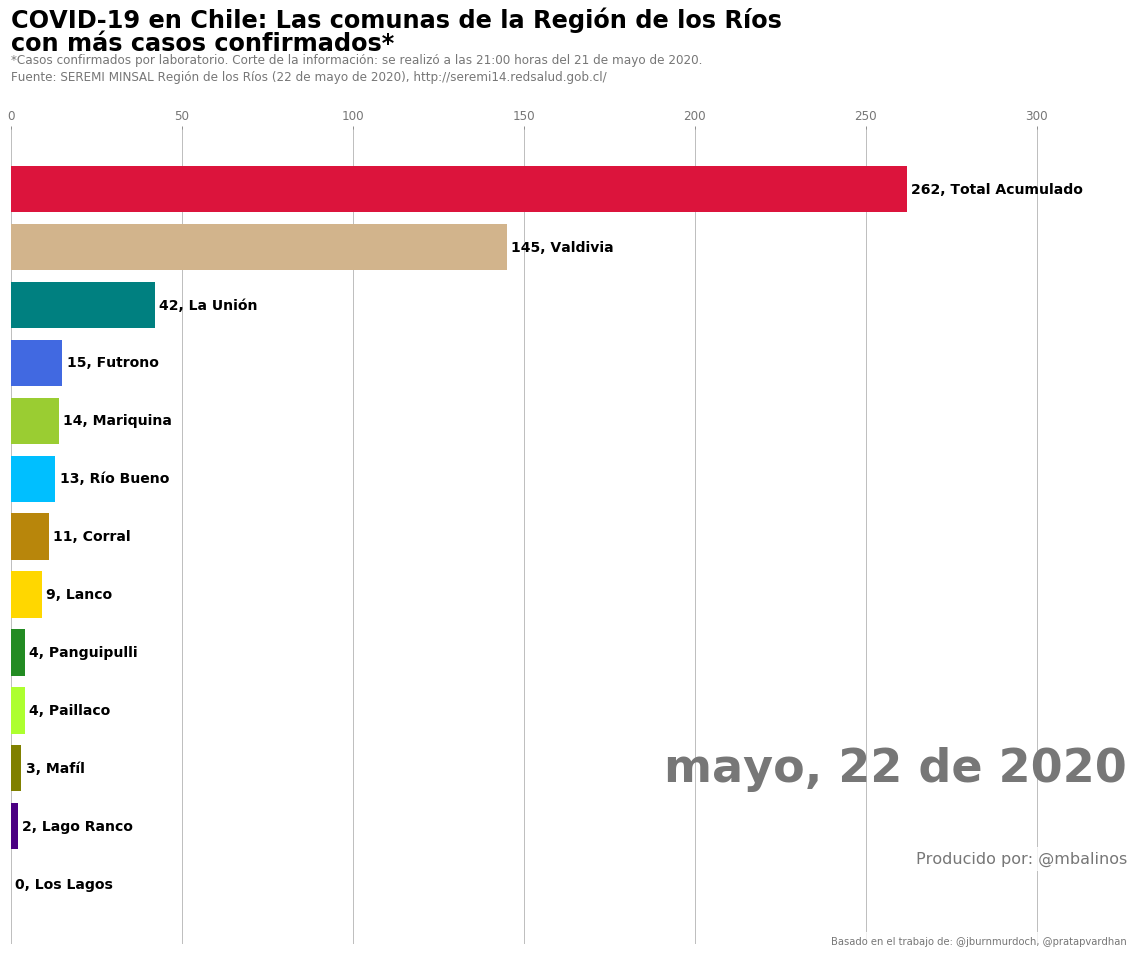

In [5]:
fig, ax = plt.subplots(figsize=(20, 15))
#color_list=list(mcolors.CSS4_COLORS.values())[0:17]
color_list=['tan','darkgoldenrod','gold','darkkhaki','olive','yellowgreen',
            'greenyellow','forestgreen','teal','deepskyblue','royalblue','indigo','crimson']

comunas = ['Valdivia','Corral','Lanco','Los Lagos','Mafíl','Mariquina','Paillaco','Panguipulli',
            'La Unión','Río Bueno','Futrono','Lago Ranco','Total Acumulado']
colors = dict(zip(comunas,color_list))


def draw_barchart(current_day_obj):
    current_day = str(current_day_obj)
    date_obj = dateutil.parser.parse(current_day)
    dff = df.loc[current_day, comunas].sort_values(ascending=True)
    ax.clear()
    ax.barh(range(0,13), dff, color=[colors[x] for x in dff.keys()])
    dx = dff.max()/200
    xmax = df.loc[str(date_end_int)].max()*1.2
    
    ax.set_autoscale_on(False)
    ax.set_xlim(0, xmax)
    
    for i, (value, name) in enumerate(zip(dff, dff.keys())):
        ax.text(value+dx, i,     str(int(value))+', '+name,           size=14, weight=600, ha='left', va='center')        
    ax.text(1, 0.2, date_obj.strftime('%B, %d de %Y'), transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.08, '*Casos confirmados por laboratorio. Corte de la información: se realizó a las 21:00 horas del '+date_prev_obj.strftime('%d de %B de %Y.'), transform=ax.transAxes, size=12, color='#777777')
    ax.text(0, 1.06, 'Fuente: SEREMI MINSAL Región de los Ríos '+date_end_obj.strftime('(%d de %B de %Y)')+', http://seremi14.redsalud.gob.cl/', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01, tight=False)
    ax.grid(which='major', axis='x', linestyle='-')
    
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID-19 en Chile: Las comunas de la Región de los Ríos',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(0, 1.12, 'con más casos confirmados*',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0.1, 'Producido por: @mbalinos', transform=ax.transAxes, size=16, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0, 'Basado en el trabajo de: @jburnmurdoch, @pratapvardhan', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(date_end_obj)

plt.savefig('COVID19CL_R14_current.png')

<IPython.core.display.HTML object>

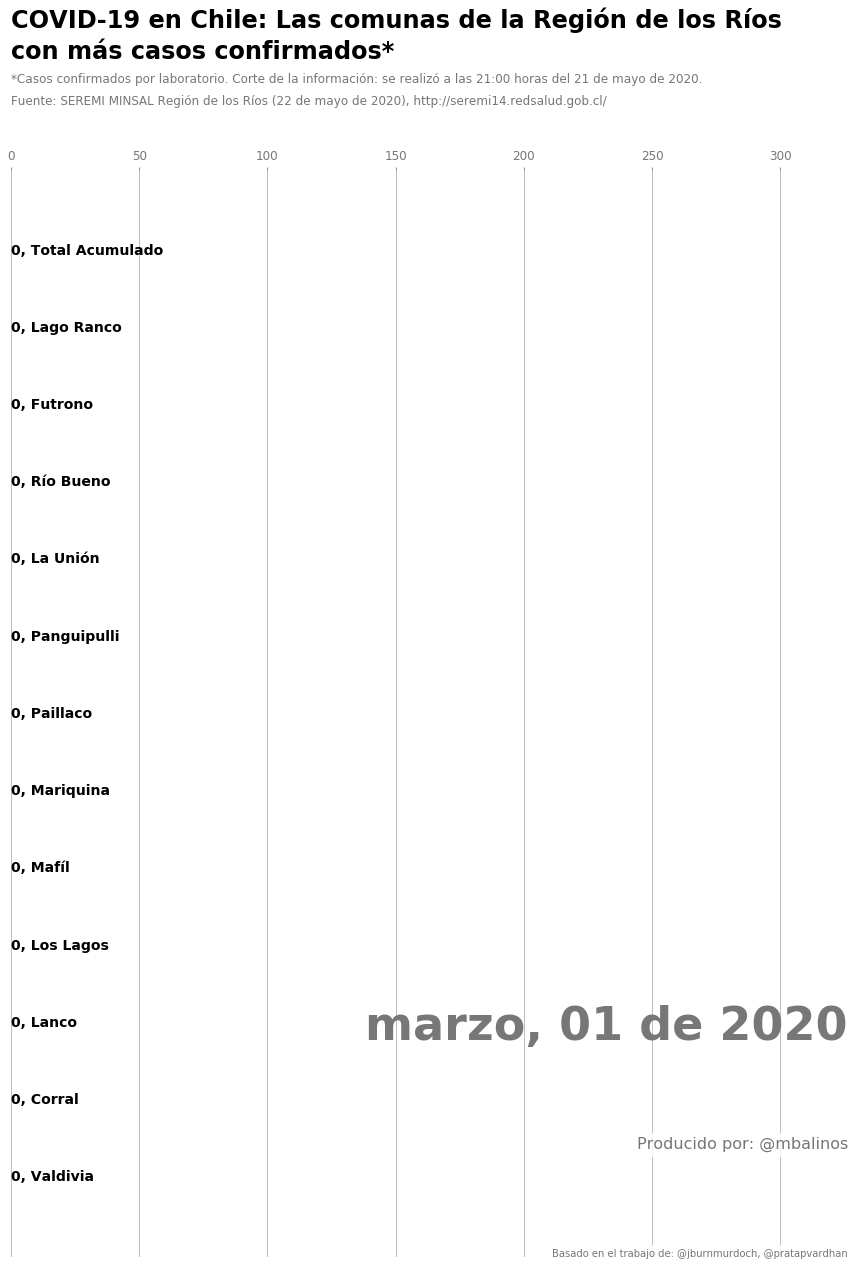

In [6]:
fig, ax = plt.subplots(figsize=(15, 20))
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start=date_begin_obj,end=date_end_obj))
HTML(animator.save('COVID19CL_R14_current.gif', writer='imagemagick', fps=1))
#HTML(animator.to_jshtml(fps=1))
#HTML(animator.to_html5_video())
# or use animator.to_html5_video() or animator.save() 

![gif](https://gitlab.com/mbalinos/covid-19-en-chile/-/raw/master/COVID19CL_R14_current.gif)
